### RNN, LSTM 돌려보기: 열 1개 데이터로
가능한 한 교재 코드를 따라해봤지만 모델이 제대로 학습하지 않음.   
w13_RNN_LSTM2.ipynb에서 chatGPT가 준 코드와 비교하며 찾아보니, 데이터를 정규화하지 않아 발생하는 문제였음!   
RNN에서는 범위가 0~1을 넘어가는 데이터를 꼭 정규화할 것.

In [82]:
# 라이브러리

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

#### 데이터 다루기

In [83]:
# 샘플 데이터 생성 함수

def make_sample(data, window):
    train = []
    target = []
    for i in range(len(data) - window):  # 생성할 샘플 수만큼 반복
        train.append(data[i:i+window])  # 데이터를 i ~ (i + window - 1)까지 저장(입력)
        target.append(data[i+window])  # (i + window)번째 데이터(정답)
    
    return np.array(train), np.array(target)  # 둘을 numpy로 return

In [84]:
# 데이터 가져오기

df = pd.read_csv('../AAME.csv')

print(df.head())  # 데이터 확인

df = df.drop(columns='Date')

print(df.head())

df = df['Open'].values.reshape(-1, 1)  # Open 값만 써서 해 보기

print(df)

         Date  Open  High   Low  Close  Adj Close  Volume
0  1980-03-17   0.0  4.05  3.85   3.85   3.213167   15000
1  1980-03-18   0.0  4.00  3.80   3.80   3.171437   10200
2  1980-03-19   0.0  4.05  3.85   3.85   3.213167   33500
3  1980-03-20   0.0  4.00  3.80   3.80   3.171437    8700
4  1980-03-21   0.0  3.95  3.75   3.75   3.129709   12700
   Open  High   Low  Close  Adj Close  Volume
0   0.0  4.05  3.85   3.85   3.213167   15000
1   0.0  4.00  3.80   3.80   3.171437   10200
2   0.0  4.05  3.85   3.85   3.213167   33500
3   0.0  4.00  3.80   3.80   3.171437    8700
4   0.0  3.95  3.75   3.75   3.129709   12700
[[0.       ]
 [0.       ]
 [0.       ]
 ...
 [2.25     ]
 [2.1099999]
 [2.1099999]]


In [85]:
# 결측치 제거

df = df[df != 0.0].reshape(-1, 1)  # 0.0 인 행 제거

# 데이터 정규화(필수!)

scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [86]:
# X와 y 제작

window_size = 30

X, y = make_sample(df, window_size)

# train, test 분할(어째선지 얘는 train_test_split을 쓰면 데이터가 이상해짐)

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

X_train

array([[[0.25163704],
        [0.22918615],
        [0.22918615],
        ...,
        [0.28157154],
        [0.292797  ],
        [0.292797  ]],

       [[0.22918615],
        [0.22918615],
        [0.31150607],
        ...,
        [0.292797  ],
        [0.292797  ],
        [0.292797  ]],

       [[0.22918615],
        [0.31150607],
        [0.36014967],
        ...,
        [0.292797  ],
        [0.292797  ],
        [0.27782975]],

       ...,

       [[0.24415341],
        [0.24789523],
        [0.24565014],
        ...,
        [0.25388212],
        [0.25612721],
        [0.25537885]],

       [[0.24789523],
        [0.24565014],
        [0.24490178],
        ...,
        [0.25612721],
        [0.25537885],
        [0.25912068]],

       [[0.24565014],
        [0.24490178],
        [0.2404116 ],
        ...,
        [0.25537885],
        [0.25912068],
        [0.25837231]]])

#### 1. RNN 모델

In [87]:
# 모델 정의: RNN

model = Sequential()

model.add(SimpleRNN(50, activation='tanh', input_shape=(window_size,1)))
model.add(Dense(1, activation='tanh'))

model.compile(optimizer='adam', loss='mse', metrics = ['mse', 'mae'])

model.summary()

c:\Users\jt341\anaconda3\envs\2025AI\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_10 (SimpleRNN)       │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0038 - mae: 0.0326 - mse: 0.0038
Epoch 2/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8989e-04 - mae: 0.0128 - mse: 3.8989e-04
Epoch 3/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1512e-04 - mae: 0.0116 - mse: 3.1512e-04
Epoch 4/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9597e-04 - mae: 0.0109 - mse: 2.9597e-04
Epoch 5/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4458e-04 - mae: 0.0105 - mse: 2.4458e-04
Epoch 6/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3124e-04 - mae: 0.0099 - mse: 2.3124e-04
Epoch 7/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3800e-04 - mae: 0.0097 - mse: 2.3800e-04
Epoch 8/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3209e-04 - mae: 0.0094 - mse: 2.3209e-04
Epoch 9/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0039e-04 - mae: 0.0092 - mse: 2.0039e-04
Epoch 10/15
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7292e-04 - mae: 0.

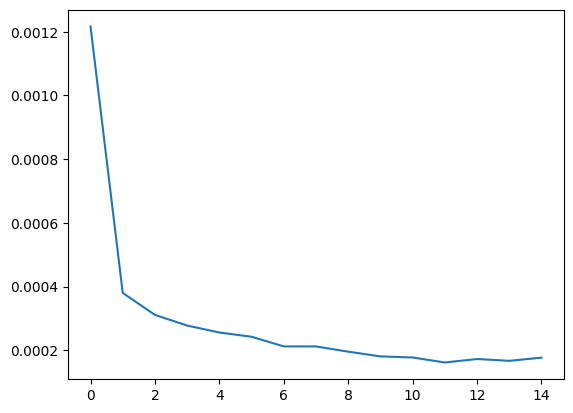

In [88]:
# 모델 학습 및 학습 결과 시각화

history = model.fit(X_train, y_train, epochs=15, verbose=1)

plt.plot(history.history['mse'], label="mse")

plt.show()

[[0.2474024 ]
 [0.24372873]
 [0.24208838]
 ...
 [0.12897047]
 [0.12869397]
 [0.12001142]]


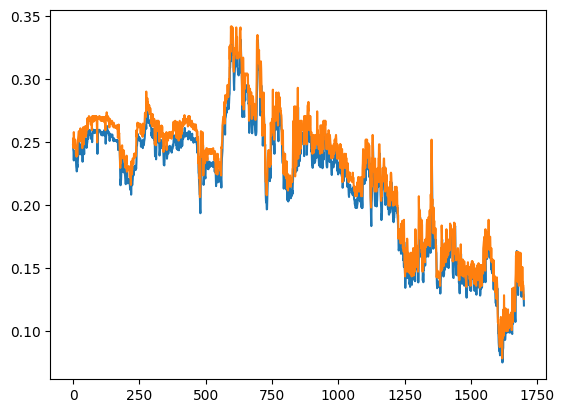

In [89]:
# 모델 평가

y_pred = model.predict(X_test, verbose=0)

print(y_pred)

plt.plot(y_pred)
plt.plot(y_test)

plt.show()